In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
#Normalize the data
x_train = x_train/255.0
x_test = x_test/255.0

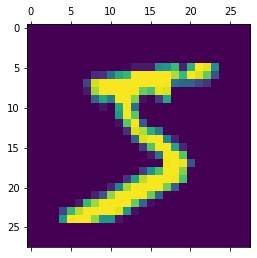

In [20]:
plt.matshow(x_train[0])

In [4]:
#Create a model:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(130,activation='softplus'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 2ms/step - loss: 0.3221 - accuracy: 0.9076
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1582 - accuracy: 0.9537
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1068 - accuracy: 0.9685
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0792 - accuracy: 0.9759
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0615 - accuracy: 0.9812
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0480 - accuracy: 0.9856
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0389 - accuracy: 0.9879
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0309 - accuracy: 0.9902
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0247 - accuracy: 0.9926
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.020

In [7]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1076 - accuracy: 0.9797


[0.10759017616510391, 0.9797000288963318]

In [9]:
predicted = model.predict(x_test)

In [14]:
predicted_labels= [numpy.argmax(i) for i in predicted]

In [15]:
c_matrix = tf.math.confusion_matrix(labels=y_test,predictions=predicted_labels)
c_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    0,    1,    1,    0,    2,    1,    1,    0],
       [   1, 1122,    2,    3,    0,    1,    4,    1,    1,    0],
       [   2,    1, 1008,    3,    2,    0,    3,    4,    8,    1],
       [   1,    0,    2,  991,    0,    5,    0,    1,    3,    7],
       [   1,    1,    2,    0,  959,    0,    8,    1,    1,    9],
       [   3,    0,    0,   17,    1,  863,    4,    0,    3,    1],
       [   6,    2,    2,    0,    1,    6,  940,    0,    1,    0],
       [   1,    1,    8,    5,    2,    0,    0, 1002,    3,    6],
       [   6,    0,    1,    1,    2,    5,    2,    2,  950,    5],
       [   2,    2,    0,    6,    4,    4,    1,    4,    4,  982]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

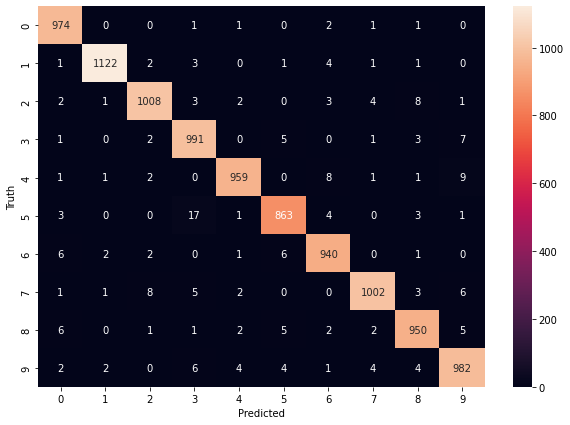

In [19]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(c_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')